# Written Digit Recognition
by Trung Nguyen

## 1. Introduction

In this project, I tried out various machine learning models to test and determine which model will yield the best result for Written Digit Recognition model. Some models include K-nearest neighbors classifier, random forest classifier, support vector classification. In the future, I also look into developing this model more using convolutional neural network, and build an application where users can input hand-written digit to be recognized by computer. From then I want to further develop it by introducing character recognition and so on.

This data can be found at https://www.kaggle.com/c/digit-recognizer

In [2]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Preparing the data

### 2.1 Load data

In [3]:
#importing the dataset
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

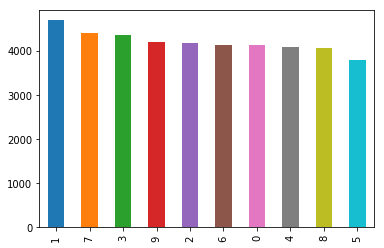

In [4]:
#seperating the train dataset into training data and target
from sklearn import model_selection
target = train_dataset['label']
train_set = train_dataset.iloc[:, 1:]
target.value_counts().plot(kind='bar')

We have similar counts for all 10 digits

### 2.2 Check for null and missing values

In [5]:
#check missing values for trainw
train_dataset.isnull().any().any()

False

Since there is no missing values, we can move ahead with other steps.

### 2.3 Normalization

Since the pixel data are represented in the range of 0-255, it is better to normalize the data to range 0-1. This is so that the model will run faster in compared to the initial data.

In [6]:
train_set = train_set/255

### 2.4 Print some test images
The below contains some random images from the train set, along with its label.

2


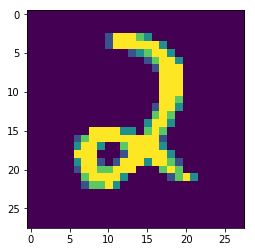

In [7]:
i = 2421 #change this value to get a new number
image_test = np.array(train_set.iloc[i, :])
b = np.reshape(image_test, (28,28))
plt.imshow(b)
print (target[i])

What a thing of beauty! Now let's go to split the train and the validation set, then we can start training out models.

### 2.5 Split training and validation set

In [9]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(train_set, target)

## 3. Training the model

### 3.1 Random Forest Classifier

The first model I want to try out is the Random Forest Classifier

In [10]:
#import Random Forest Classifier model and train it
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
#prediction from train set: 
from sklearn.metrics import classification_report
predictions = rf.predict(X_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1054
           1       0.98      0.98      0.98      1177
           2       0.95      0.97      0.96      1016
           3       0.96      0.95      0.95      1133
           4       0.96      0.97      0.97      1004
           5       0.97      0.97      0.97       950
           6       0.98      0.98      0.98      1026
           7       0.97      0.97      0.97      1058
           8       0.95      0.95      0.95       993
           9       0.96      0.95      0.95      1089

   micro avg       0.97      0.97      0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



We can see that the f1-score is around 0.96. It's not bad, but not exceptional either. This means in 25 numbers, the computer will determine one wrong! 

Since the precision and recall scores are the same, we should try out some other model and see how they do.

### 3.2 K-nearest neighbors

#### Note: This function takes a long time to run

In [12]:
#import knn and train it
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#prediction from train set: 
predictions = knn.predict(X_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1030
           1       0.95      0.99      0.97      1198
           2       0.98      0.94      0.96      1030
           3       0.96      0.97      0.96      1073
           4       0.97      0.96      0.97      1047
           5       0.96      0.96      0.96       944
           6       0.98      0.99      0.99      1037
           7       0.95      0.96      0.95      1118
           8       0.98      0.93      0.95      1008
           9       0.95      0.96      0.95      1015

   micro avg       0.97      0.97      0.97     10500
   macro avg       0.97      0.96      0.96     10500
weighted avg       0.97      0.97      0.97     10500



So the result is somewhat better than random forest classifier, but it takes a very long time to run. 

### 3.3 Support vector classification

#### Note: This function takes a long time to run

In [8]:
#import support vector classifier and train it
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

C:\Users\John Nguyen\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
#prediction from train set:
from sklearn.metrics import classification_report
predictions = knn.predict(X_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1030
           1       0.94      0.98      0.96      1198
           2       0.93      0.91      0.92      1030
           3       0.92      0.90      0.91      1073
           4       0.92      0.94      0.93      1047
           5       0.89      0.91      0.90       944
           6       0.95      0.96      0.95      1037
           7       0.95      0.92      0.93      1118
           8       0.93      0.90      0.91      1008
           9       0.92      0.91      0.91      1015

   micro avg       0.93      0.93      0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



That takes some time to run. And it doesn't perform as well as out first model (random forest classifier). The f1-score stops at only 0.93, which is horrible. No one likes a machine that gets 1 wrong out of 12 digits.

### 3.4 Convolutional Neural Network

## 4. Prediction in use

Let's try and predict the test_dataset using random forest classifier. 

In [12]:
a = rf.predict(test_dataset)

For the following function, everytime it is run there should be an image output and a number recognized from the model. I would expect 1 out of 25 runs is wrong on average. 

Is the following number 6?


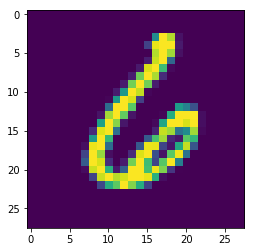

In [27]:
import random
def try_a_number():
    i = random.randint(0,27999)
    image_test = np.array(test_dataset.iloc[i, :])
    b = np.reshape(image_test, (28,28))
    plt.imshow(b)
    print ("Is the following number " + str(a[i])+"?")
try_a_number()